## Diabetes Prediction

### Import Libraries

In [153]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as du
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import scipy.stats as st

### Read Data

In [154]:
diabetes_df = pd.read_csv('diabetes+130-us+hospitals+for+years+1999-2008\diabetic_data.csv')
diabetes_df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


### Data Wrangling

In [155]:
# Replace '?' in dataframe with pandas NA 
diabetes_df = diabetes_df.replace('?', pd.NA)
diabetes_df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,<NA>,<NA>,<NA>,<NA>,<NA>
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [156]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Get some Statistics

In [157]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [158]:
#diabetes_df.drop(columns=['weight', 'encounter_id', ])
diabetes_df.describe(include='object').T

,count,unique,top,freq
race,99493,5,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,3197,9,[75-100),1336
payer_code,61510,17,MC,32439
medical_specialty,51817,72,InternalMedicine,14635
diag_1,101745,716,428,6862
diag_2,101408,748,276,6752
diag_3,100343,789,250,11555
max_glu_serum,101766,4,None,96420


Race

In [159]:
# Replace NA values in race with missing
diabetes_df['race'] = diabetes_df['race'].replace(pd.NA, 'Missing')
print('Race Value Counts:')
print(diabetes_df['race'].value_counts())

Race Value Counts:
Caucasian          76099
AfricanAmerican    19210
Missing             2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


Medical Specialty (Specialty of the admitting physician)

In [160]:
diabetes_df['medical_specialty'] = diabetes_df['medical_specialty'].replace(pd.NA, 'Missing')
# Keep the top five value
other = diabetes_df['medical_specialty'].value_counts().index[5:]
diabetes_df['medical_specialty'] = diabetes_df['medical_specialty'].replace(other, 'Other')
print('Medical Specialty Value Counts:')
print(diabetes_df['medical_specialty'].value_counts())

Medical Specialty Value Counts:
Missing                   49949
Other                     16825
InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5352
Name: medical_specialty, dtype: int64


Diag 1 (Diagnosis)

In [161]:
diabetes_df['diag_1'] = diabetes_df['diag_1'].replace(pd.NA, '0')

diabetes_df.loc[diabetes_df['diag_1'].str.startswith('E') | diabetes_df['diag_1'].str.startswith('V'), 'diag_1'] = '1'

diabetes_df['diag_1'] = diabetes_df['diag_1'].astype('float')

diabetes_df['diagnosis'] = None

circulatory = ((diabetes_df['diag_1'] >= 390) & (diabetes_df['diag_1'] <= 459)) | (diabetes_df['diag_1'] == 785) 
diabetes_df.loc[circulatory, 'diagnosis'] = 'Circulatory'

respiratory = ((diabetes_df['diag_1'] >= 460) & (diabetes_df['diag_1'] <= 519)) | (diabetes_df['diag_1'] == 786)
diabetes_df.loc[respiratory, 'diagnosis'] = 'Respiratory'

digestive = ((diabetes_df['diag_1'] >= 520) & (diabetes_df['diag_1'] <= 579)) | (diabetes_df['diag_1'] == 787)
diabetes_df.loc[digestive, 'diagnosis'] = 'Digestive'

diabetes = ((diabetes_df['diag_1'] > 250) & (diabetes_df['diag_1'] < 251))
diabetes_df.loc[diabetes, 'diagnosis'] = 'Diabetes'

musculoskeletal = (diabetes_df['diag_1'] >= 800) & (diabetes_df['diag_1'] <= 999)
diabetes_df.loc[musculoskeletal, 'diagnosis'] = 'musculoskeletal'

genitourinary = ((diabetes_df['diag_1'] >= 580) & (diabetes_df['diag_1'] <= 629)) | (diabetes_df['diag_1'] == 788)
diabetes_df.loc[genitourinary, 'diagnosis'] = 'Genitourinary'

neoplasms = (diabetes_df['diag_1'] >= 140) & (diabetes_df['diag_1'] <= 239)
diabetes_df.loc[neoplasms, 'diagnosis'] = 'Neoplasms'

diabetes_df.loc[diabetes_df['diagnosis'].isna(), 'diagnosis'] = 'Other'

print('Diagnosis Value Counts:')
print(diabetes_df['diagnosis'].value_counts())

Diagnosis Value Counts:
Circulatory        30437
Other              23385
Respiratory        14423
Digestive           9475
Diabetes            8522
musculoskeletal     6974
Genitourinary       5117
Neoplasms           3433
Name: diagnosis, dtype: int64


Admission Source Id

In [162]:
other = diabetes_df['admission_source_id'].value_counts().index[2:]
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].replace(other, 'Other')
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].replace([7, 1], ['Emergency', 'Referral'])
print('Admission Source Value Counts:')
print(diabetes_df['admission_source_id'].value_counts())

Admission Source Value Counts:
Emergency    57494
Referral     29565
Other        14707
Name: admission_source_id, dtype: int64


HbA1c

In [163]:
high_changed = ((diabetes_df['A1Cresult'] == '>8') | (diabetes_df['A1Cresult'] == '>7')) & (diabetes_df['change'] == 'Ch')
high_notchanged = ((diabetes_df['A1Cresult'] == '>8') | (diabetes_df['A1Cresult'] == '>7')) & (diabetes_df['change'] == 'No')

diabetes_df.loc[high_changed, 'A1Cresult'] = 'High Changed'
diabetes_df.loc[high_notchanged, 'A1Cresult'] = 'High Not Changed'

print('HbA1c Value Counts')
print(diabetes_df['A1Cresult'].value_counts())

HbA1c Value Counts
None                84748
High Changed         7284
Norm                 4990
High Not Changed     4744
Name: A1Cresult, dtype: int64


### Data Visualization

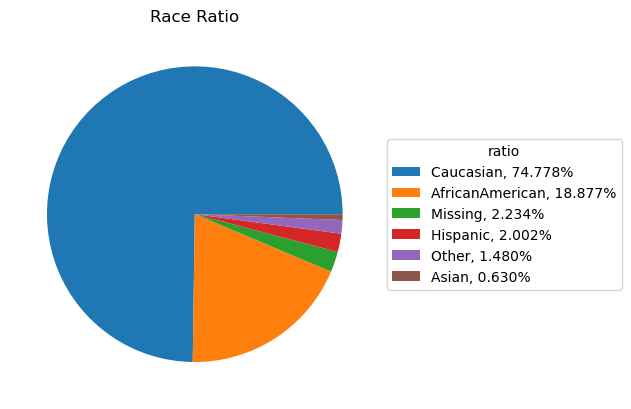

In [164]:
race_value_counts = diabetes_df['race'].value_counts()
labels = race_value_counts.index

labels = [f'{l}, {(s / sum(race_value_counts)*100):.3f}%' for l, s in zip(labels, race_value_counts)]

explode = [0] * len(race_value_counts)
wedges, texts = plt.pie(race_value_counts, explode=explode, pctdistance=1.3, labeldistance=1.5)

plt.title('Race Ratio')
plt.legend(labels=labels,
           title="ratio",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

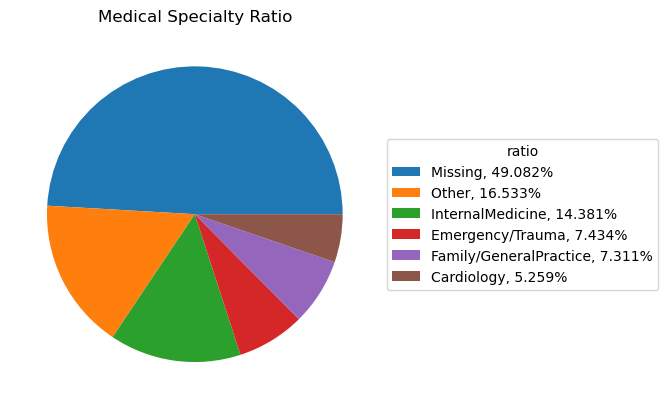

In [165]:
diabetes_df['medical_specialty']

medical_specialty_value_counts = diabetes_df['medical_specialty'].value_counts()
labels = medical_specialty_value_counts.index

labels = [f'{l}, {(s / sum(medical_specialty_value_counts)*100):.3f}%' for l, s in zip(labels, medical_specialty_value_counts)]

explode = [0] * len(medical_specialty_value_counts)
wedges, texts = plt.pie(medical_specialty_value_counts, explode=explode, pctdistance=1.3, labeldistance=1.5)

plt.title('Medical Specialty Ratio')
plt.legend(labels=labels,
           title="ratio",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

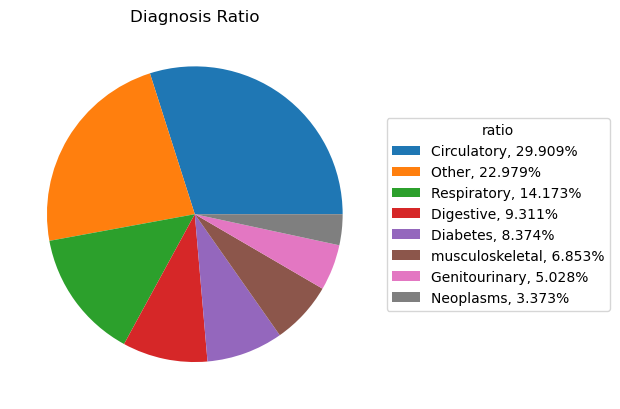

In [167]:
diabetes_df['diagnosis']

diagnosis_value_counts = diabetes_df['diagnosis'].value_counts()
labels = diagnosis_value_counts.index

labels = [f'{l}, {(s / sum(diagnosis_value_counts)*100):.3f}%' for l, s in zip(labels, diagnosis_value_counts)]

explode = [0] * len(diagnosis_value_counts)
wedges, texts = plt.pie(diagnosis_value_counts, explode=explode, pctdistance=1.3, labeldistance=1.5)

plt.title('Diagnosis Ratio')
plt.legend(labels=labels,
           title="ratio",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()